**Submit:**<br>
Roei Lavie - 207480690<br>
Moshiko Bitton - 206933855<br>
Tamir Uzan - 316394071<br>



# Introduction


**<u>Filtering irrelevent columns and rows:</u>**<br>

At first the data contained 365 million rows and 8 columns, we could not load this large amount of data in the google colab so we did it in pycharm.<br>

We did those steps in pycharm:<br>
1) Dropped few columns<br>
2) Dropped nulls, duplicates and values that were less then million dollars<br>
3) Because the import and the export are complimentary to each other we decided to remain with the export<br>
4) There were heirarchy in many products so we decided to remove them and to remain only with the products that are in the same level<br>
5) There were heirarchy also to countries, for example export from Israel to Europe.<br>

After those steps, the data contained 5,246,516 rows.<br>



<u>**Load of the data takes approx. 30 seconds**</u>




In [230]:
!pip install networkx
!pip install matplotlib
!pip install plotly
!pip install pandas
!pip install numpy
!pip install itertools
!pip install powerlaw
!pip install requests
!pip install math
!pip install io


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math
ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


In [231]:
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
import itertools
import powerlaw
import requests
import math
import io

In [232]:
response1 = requests.get('https://raw.githubusercontent.com/roeilavie/Datasets/main/TradeZone1.csv')
response2 = requests.get('https://raw.githubusercontent.com/roeilavie/Datasets/main/TradeZone2.csv')
response3 = requests.get('https://raw.githubusercontent.com/roeilavie/Datasets/main/TradeZone3.csv')

# Get the content from the responses
content1 = response1.content
content2 = response2.content
content3 = response3.content

# Convert the content to DataFrame
df1 = pd.read_csv(io.StringIO(content1.decode('utf-8')))
df2 = pd.read_csv(io.StringIO(content2.decode('utf-8')))
df3 = pd.read_csv(io.StringIO(content3.decode('utf-8')))

# Concat all the dataframes
df = pd.concat([df1, df2, df3], join='inner')
df['Year'] = df['Year'].astype(int)
df.rename(columns={'Id': 'Id', 'Reporter': 'Reporter', 'Partner': 'Partner', 'Year': 'Year', 'Value': 'Value (M$)', 'Category': 'Product'}, inplace=True)
df['Value (M$)'] = df['Value (M$)'].str.replace(",", "").astype(float)
df.reset_index(drop=True, inplace=True)
df

,Id,Reporter,Partner,Year,Value (M$),Product
0,1,BEL,GRC,2005,459.548,D21
1,2,BEL,GRC,2006,484.072,D21
2,3,BEL,GRC,2007,631.581,D21
3,4,BEL,GRC,2008,684.156,D21
4,5,BEL,GRC,2009,745.909,D21
...,...,...,...,...,...,...
5246511,5535533,ROU,PYF,2019,5.016,MHRD
5246512,5535534,ROU,PYF,2020,2.148,MHRD
5246513,5535535,ROU,PYF,2021,1.998,MHRD
5246514,5535536,NIC,AUT,2021,3.628,D242T32


In [233]:
df.shape

(5246516, 6)

<u>**Load the products and the countries**</u>

In [234]:
response = requests.get('https://raw.githubusercontent.com/roeilavie/Datasets/main/Products.csv')

# Get the content from the responses
content = response.content

# Convert the content to DataFrame
df_products = pd.read_csv(io.StringIO(content.decode('utf-8')))
df_products

,Code,Description,Id
0,COMEQ,Commuincation equipment,1
1,COMPP,Computers and peripheral equipment,2
2,CONEQ,Consumer electronic equipment,3
3,D01,"Crop and animal production, hunting.",4
4,D02,Forestry and logging,5
...,...,...,...
69,OTHW,"Other waste, not elsewhere specified",75
70,UNALLOC,Confidential or unallocated,76
71,UNALLOCATED,Confidential and unallocated,77
72,UNALLOCRD,Unallocated R&D intensive industries,78


In [235]:
response = requests.get('https://raw.githubusercontent.com/roeilavie/Datasets/main/Countries.csv')

# Get the content from the responses
content = response.content

# Convert the content to DataFrame
df_countries = pd.read_csv(io.StringIO(content.decode('utf-8')))

df_countries

,Id,Country,Code,Continent
0,1,Aruba,ABW,Americas
1,2,Afghanistan,AFG,Asia
2,3,Angola,AGO,Africa
3,6,Albania,ALB,Europe
4,7,Andorra,AND,Europe
...,...,...,...,...
194,242,Samoa,WSM,Oceania
195,243,Yemen,YEM,Asia
196,244,South Africa,ZAF,Africa
197,245,Zambia,ZMB,Africa


# About products and trade relations


<u>**Which are the most traded products?**</u>



In [236]:
grouped_products_df = df.groupby('Product')['Value (M$)'].sum()
result = pd.merge(df_products, grouped_products_df, left_on='Code', right_on='Product', how='inner')
sorted_result = result.sort_values('Value (M$)', ascending=False)

# Assuming sorted_result is your sorted DataFrame
fig = px.scatter(y=sorted_result.Description, x=sorted_result['Value (M$)'])

# Define the indices of the nodes to highlight
highlight_indices = [64]  # Adjust with your chosen node indices

# Create a list to store the marker colors
marker_colors = ['rgba(255, 0, 0, 1)' if i in highlight_indices else 'rgba(0, 0, 255, 1)' for i in range(len(sorted_result))]

# Update the marker colors in the scatter plot
fig.update_traces(marker=dict(color=marker_colors, size=6))

# Adjust the margin to add space between Y axis and the chart
fig.update_layout(
    width=1000,
    height=800,
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust the values as per your preference
)

fig.show()


# Functions

Create the graph

In [237]:

def create_graph(selected_product, selected_year):

  trades = df[(df['Product'] == selected_product) & (df['Year'] == selected_year)]
  trades.reset_index(drop=True, inplace=True)

  # Create an empty graph
  G = nx.Graph()

  for _, row in df_countries.iterrows():
    # Extract relevant data from the row
    code = row['Code']
    name = row['Country']
    continent = row['Continent']

    # Add nodes and edge to the graph
    G.add_node(code, name = continent)

  for _, row in trades.iterrows():
      # Extract relevant data from the row
      source_node = row['Reporter']
      target_node = row['Partner']
      weight = row['Value (M$)']

      # Add nodes and edge to the graph
      G.add_edge(source_node, target_node, weight=weight)

  largest_cc = max(nx.connected_components(G), key=len)
  # Create a subgraph containing only the largest connected component
  G = G.subgraph(largest_cc)

  # Set the node size parameter
  node_size = 300

  # Set the label font size
  label_font_size = 8
  k = 2

  # Visualize the graph with adjusted parameters
  pos = nx.spring_layout(G, k=k)
  nx.draw(G, pos, with_labels=True, node_size=node_size, font_size=label_font_size, alpha=0.7)


  # Show the graph
  plt.show()
  return G

Histogram degree distribution given graph

In [238]:
def histogram_degree_distribution(G):
  # Calculate the degrees of all nodes
  degrees = dict(G.degree())

  # Extract the degree values
  degree_values = list(degrees.values())

  # Create a histogram
  histogram = go.Histogram(x=degree_values, xbins=dict(size=4))

  # Create a layout
  layout = go.Layout(
      title="Degree Histogram",
      xaxis=dict(title="Degree"),
      yaxis=dict(title="Count")
  )

  # Create a Figure object
  figure = go.Figure(data=[histogram], layout=layout)
  figure.update_layout(
      bargap=0.1
  )

  # Show the histogram
  figure.show()

Function to check if its Scale-Free network

In [239]:
def is_scale_free(G):
  # Calculate the degree sequence
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

  # Fit the degree sequence to a power law distribution
  fit = powerlaw.Fit(degree_sequence, xmax=max(degree_sequence), verbose=False)
  R, p = fit.distribution_compare('power_law', 'exponential')

  # Extract the estimated exponent of the power law distribution
  alpha = fit.power_law.alpha

  # Plot the degree distribution and power law line in log-log scale
  plt.figure()
  fit.power_law.plot_ccdf(linestyle='--', color='b', label='Power law fit')
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('Degree (log scale)')
  plt.title('Power Law Distribution')
  plt.legend()
  plt.show()

  print("p value = ", p)
  if p < 0.05:
    return True
  return False

Function to check if its Small-World network

In [240]:
def is_small_world(G):
  random_graph = nx.random_reference(G, niter=100, connectivity=False)
  random_clustering_coefficient = nx.average_clustering(random_graph)
  g_clustering_coefficient = nx.average_clustering(G)
  avg_path_length = nx.average_shortest_path_length(G)
  print("Network average shortest path ", avg_path_length)
  print("Log(n) ", math.log(len(G)))
  print("Network clustering coefficient ", g_clustering_coefficient)
  print("Random network clustering coefficient ", random_clustering_coefficient)
  if avg_path_length <= math.log(len(G)) and g_clustering_coefficient > random_clustering_coefficient:
    return True
  return False

Community detection with Louvain algorithm

In [241]:
def community_detection(G):
  # Perform community detection using Louvain algorithm
  communities = greedy_modularity_communities(G)

  # Print the detected communities
  plt.figure(figsize=(12, 8))
  layout = nx.spring_layout(G)

  for i, community in enumerate(communities, start=1):
      subgraph = G.subgraph(community)
      plt.subplot(1, len(communities), i)
      # Set the node size parameter
      node_size = 300

      # Set the label font size
      label_font_size = 8
      k = 2

      # Visualize the graph with adjusted parameters
      pos = nx.spring_layout(G, k=k)
      nx.draw(subgraph, pos=layout, with_labels=True, node_size=node_size,node_color=f"C{i}",edge_color='gray', font_size=label_font_size, alpha=0.7)
      plt.title(f"Community {i}")

  plt.show()
  return communities

Calculate continents in community distribution given a graph

In [242]:
def calculate_continents_in_community_distribution(G, communities):
  continent_distribution = {}
  total = 0
  # Iterate over each node in the graph G
  for node, data in G.nodes(data=True):
      # Get the continent name for the current node
      continent = data['name']
      # Check if the continent is already in the distribution dictionary
      if continent not in continent_distribution:
          # If not, initialize it with a count of 0
          continent_distribution[continent] = 0
      # Increment the count for the continent by 1
      continent_distribution[continent] += 1
      # Increment the total count by 1
      total += 1
  # Create a copy of the continent distribution dictionary
  continent_distribution_total = continent_distribution.copy()
  # Calculate the distribution of continents as a fraction of the total
  for continent in continent_distribution_total:
      continent_distribution_total[continent] = continent_distribution_total[continent] / total
  # Create an empty dictionary to store the distribution of continents within each community
  community_distribution = {}
  # Iterate over each community
  for i, community in enumerate(communities, start=1):
    # Initialize a dictionary for the current community
    community_distribution[i] = {}
    # Iterate over each continent in the continent distribution dictionary
    for continent in continent_distribution:
      # Initialize the count for the current continent within the current community to 0
      community_distribution[i][continent] = 0
      # Iterate over each node in the current community
      for node in community:
        # Check if the continent of the current node matches the current continent
        if G.nodes[node]['name'] == continent:
          # If so, increment the count for the current continent within the current community by 1
          community_distribution[i][continent] += 1
      # Calculate the relative distribution of the current continent within the current community
      community_distribution[i][continent] = (community_distribution[i][continent] / continent_distribution[continent]) * continent_distribution_total[continent]
  # Return a sorted list of community distributions
  return [community_distribution[key] for key in sorted(community_distribution.keys())]

Get the max ground trute measure

In [243]:
def max_ground_truth_measure(G, communities):
  # Calculate the continent distribution within each community
  communities_array = calculate_continents_in_community_distribution(G, communities)
  size = len(communities_array)
  # Determine the number of communities to consider (minimum of 5 or actual community size)
  min_5_size = min(size, 5)
  continents = ['Asia', 'Americas', 'Europe', 'Oceania', 'Africa']
  max_measure = 0
  continents_arrangement = None

  # Iterate over all permutations of continent arrangements
  for i in list(itertools.permutations(continents)):
    current_measure = 0

    # Calculate the measure for the current arrangement
    for j in range(min_5_size):
      current_measure += communities_array[j][i[j]]

    # Check if the current measure is greater than the maximum measure so far
    if current_measure > max_measure:
      continents_arrangement = list(i)
      max_measure = current_measure

  # If there are more than 5 communities, consider the remaining communities
  if size > 5:
    for i in range(5, size):
      # Find the continent with the highest value within the current community
      max_key = max(communities_array[i], key=lambda k: communities_array[i][k])
      max_value = communities_array[i][max_key]

      # Update the maximum measure and append the continent to the arrangement
      max_measure += max_value
      continents_arrangement.append(max_key)

  # Return the maximum measure and the arrangement of continents
  return max_measure, continents_arrangement


# 2019 - before the corona virus

**Build a graph for specific product and year**

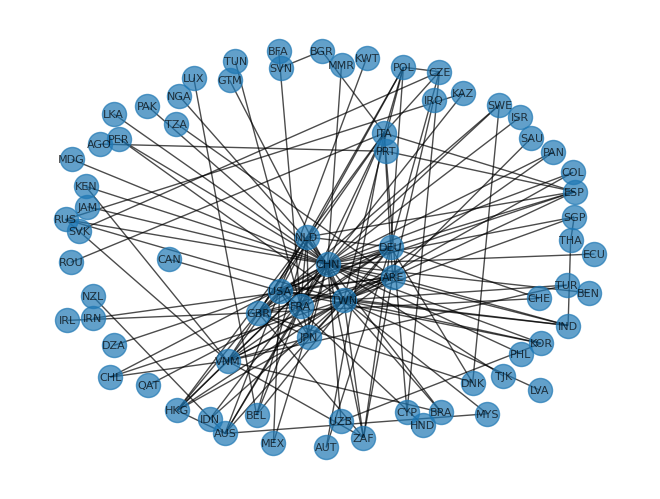

In [244]:
# Select a product and year
G = create_graph('D268', 2019)

## Community detection by using Louvain algorithm

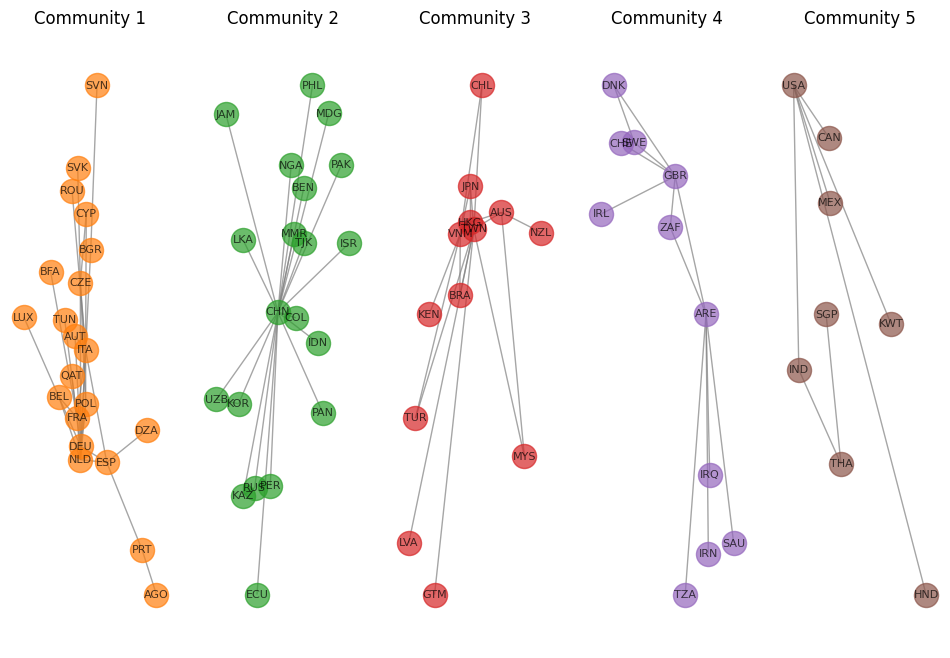

In [245]:
communities = community_detection(G)

**Results**
<br>
Check the communities arrangement's classification and calculate how close we were to the ground_truth_measure
 (community = continent)

In [246]:
ground_truth_measure_2019, continents_arrangement = max_ground_truth_measure(G, communities)
print("Ground truth measure =", ground_truth_measure_2019)
for i in range(len(communities)):
  print(f"Community {i + 1} = {continents_arrangement[i]}")

Ground truth measure = 0.4657534246575342
Community 1 = Europe
Community 2 = Asia
Community 3 = Oceania
Community 4 = Africa
Community 5 = Americas


## Scale-free Small-world model




**Degree distribution**

In [247]:
histogram_degree_distribution(G)

**Power law**




<Figure size 640x480 with 0 Axes>

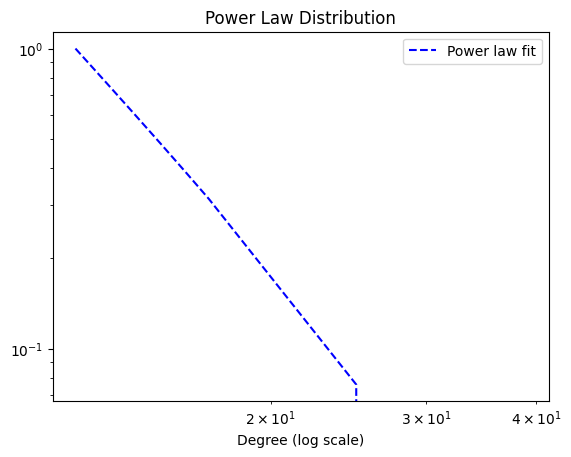

p value =  0.2232659431618076


In [248]:
scale_free_result = is_scale_free(G)

**Classify the network**

In [249]:
result_2019 = "Scale-Free network"
if scale_free_result == False:
  if is_small_world(G):
    result_2019 = "Small-World network"
  else:
    result_2019 = "neither Small-World nor Scale-Free network"

Network average shortest path  2.638888888888889
Log(n)  4.290459441148391
Network clustering coefficient  0.35715297785890265
Random network clustering coefficient  0.2642259660362634


# 2021 - after the corona virus

**Build a graph for specific product and year**

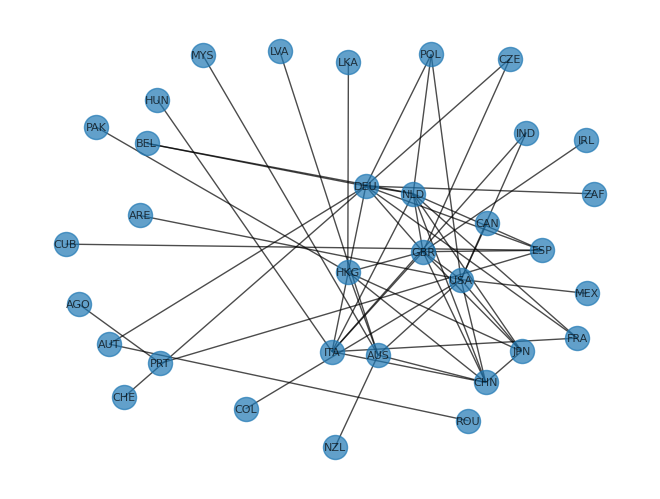

In [250]:
# Select a product and year
G = create_graph('D268', 2021)

## Community detection by using Louvain algorithm

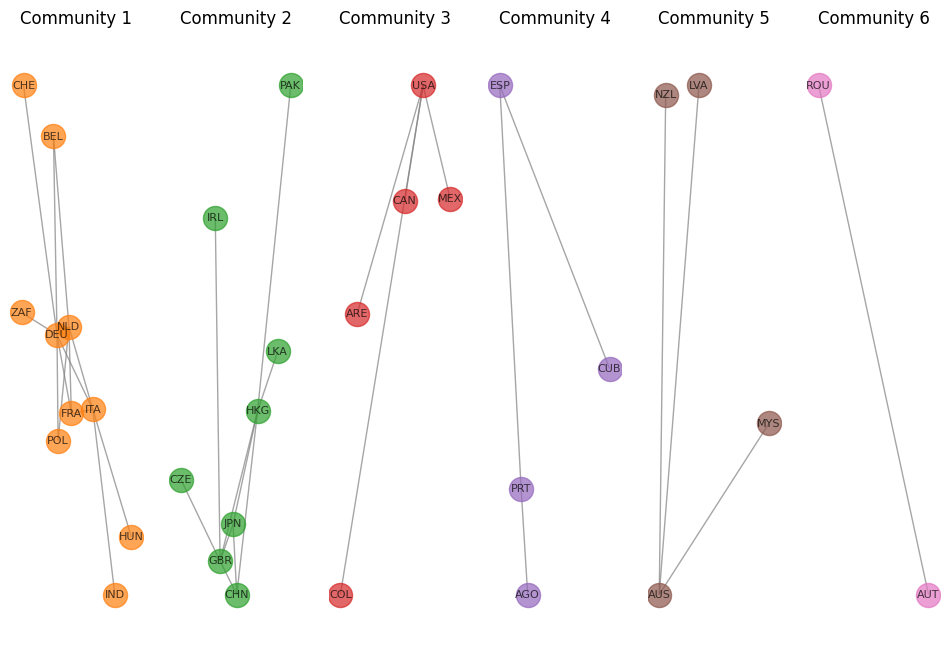

In [251]:
communities = community_detection(G)

In [252]:
ground_truth_measure_2021, continents_arrangement = max_ground_truth_measure(G, communities)
print("Ground truth measure =", ground_truth_measure_2021)
for i in range(len(communities)):
  print(f"Community {i + 1} = {continents_arrangement[i]}")

Ground truth measure = 0.6666666666666665
Community 1 = Europe
Community 2 = Asia
Community 3 = Americas
Community 4 = Africa
Community 5 = Oceania
Community 6 = Europe


## Scale-free Small-world model




**Degree distribution**

In [253]:
histogram_degree_distribution(G)

**Power law**




<Figure size 640x480 with 0 Axes>

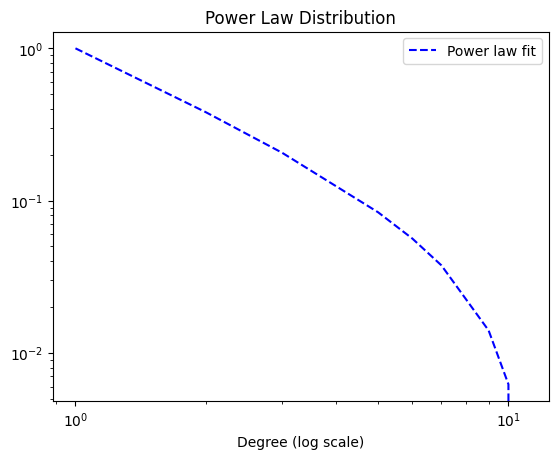

p value =  0.027355746294189024


In [254]:
scale_free_result = is_scale_free(G)

**Classify the network**

In [255]:
result_2021 = "Scale-Free network"
if scale_free_result == False:
  if is_small_world(G):
    result_2021 = "Small-World network"
  else:
    result_2021 = "neither Small-World nor Scale-Free network"

# Results

2019

In [256]:
print("The correlation between community detection and the ground truth was:", ground_truth_measure_2019)
print("The network classification was:", result_2019)


The correlation between community detection and the ground truth was: 0.4657534246575342
The network classification was: Small-World network


2021

In [257]:
print("The correlation between community detection and the ground truth was:", ground_truth_measure_2021)
print("The network classification was:", result_2021)

The correlation between community detection and the ground truth was: 0.6666666666666665
The network classification was: Scale-Free network
